In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [5]:
file_list = glob("./data/*.csv")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\schema.csv']

In [7]:
# multiple choice questions(mcq)
mcq = pd.read_csv(file_list[3])
mcq.shape

(290, 3)

In [8]:
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [9]:
mcq.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [10]:
# multiple choice answer(mca)
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.shape

(16716, 228)

In [11]:
mca.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [12]:
mca.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
mca["GenderSelect"].value_counts()

Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64

<Axes: >

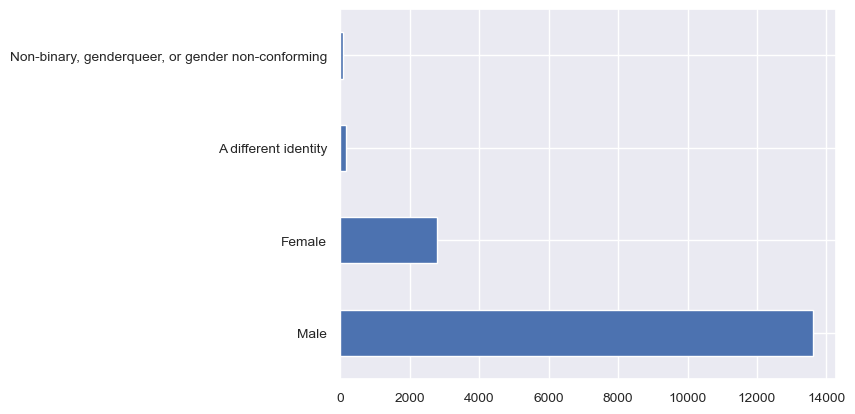

In [52]:
sns.set(font_scale=0.9)
mca["GenderSelect"].value_counts().plot.barh()

<Axes: xlabel='count', ylabel='GenderSelect'>

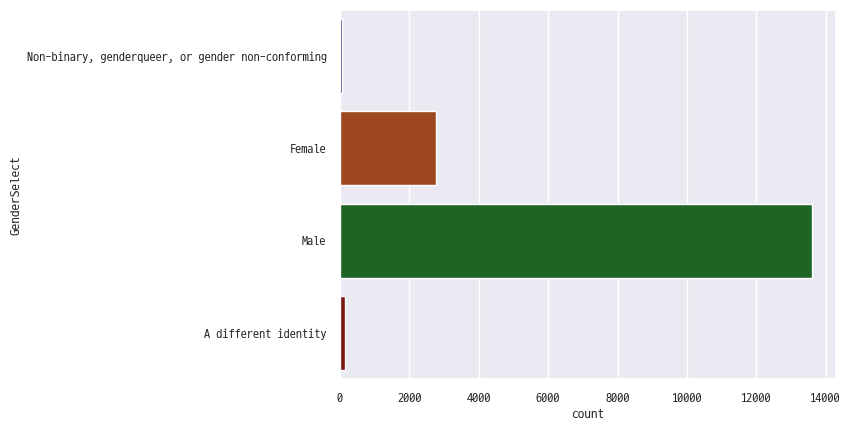

In [62]:
# plt.xticks(rotation=30)
sns.set(font="D2Coding", font_scale=0.8)
sns.countplot(mca, y="GenderSelect", palette="dark")

In [48]:
country_df = pd.DataFrame(mca["Country"].value_counts())
country_df["국가"] = country_df.index
country_df.rename({"Country": "응답수"}, axis=1, inplace=True)
country_df.reset_index(drop=True, inplace=True)
country_df.head()

,응답수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom


<Axes: xlabel='응답수', ylabel='국가'>

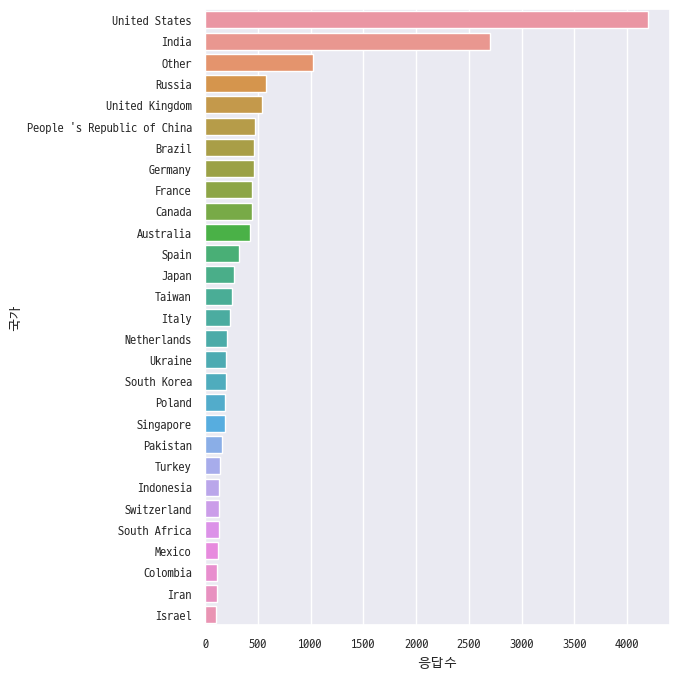

In [71]:
plt.figure(figsize=(6, 8))
# plt.xticks(rotation=30)
sns.barplot(country_df[(country_df["응답수"] >= 100)] , y="국가", x="응답수")

In [72]:
mca["Age"].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

In [88]:
mca.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [93]:
list(mca.loc[:, mca.isnull().sum() == 0].columns)

['EmploymentStatus']

In [ ]:
pd.describe_option()

In [ ]:
# pd.set_option("display.max_rows", None)
mca["Age"].value_counts()

In [ ]:
# mca.pivot_table("EmploymentStatus", index="Age", aggfunc="count")
mca.pivot_table("EmploymentStatus", index="Age", aggfunc="count").sort_values("EmploymentStatus", ascending=False)

<Axes: xlabel='Age', ylabel='Count'>

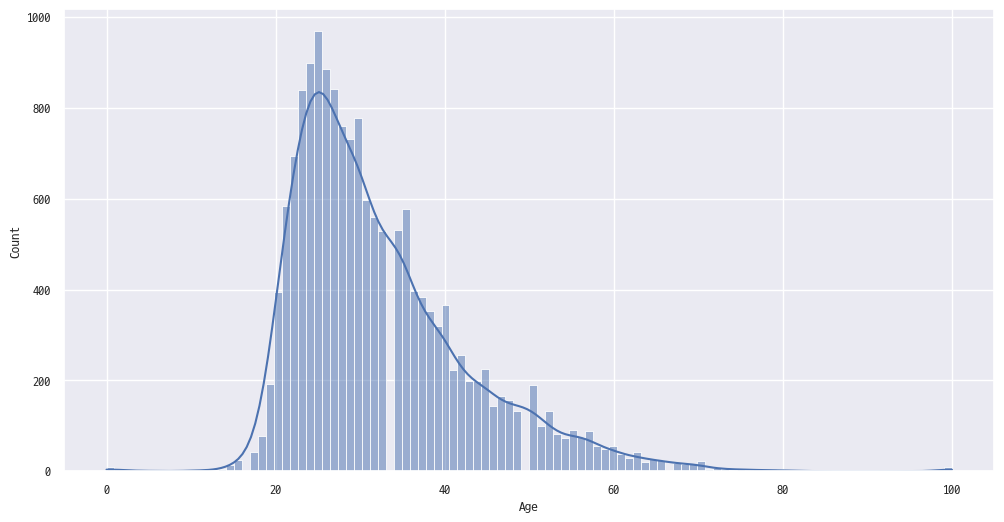

In [82]:
plt.figure(figsize=(12, 6))
sns.histplot(mca, x="Age", kde=True)

In [115]:
mca["FormalEducation"].value_counts()

Master's degree                                                      6273
Bachelor's degree                                                    4811
Doctoral degree                                                      2347
Some college/university study without earning a bachelor's degree     786
Professional degree                                                   451
I did not complete any formal education past high school              257
I prefer not to answer                                                 90
Name: FormalEducation, dtype: int64

<Axes: xlabel='count', ylabel='FormalEducation'>

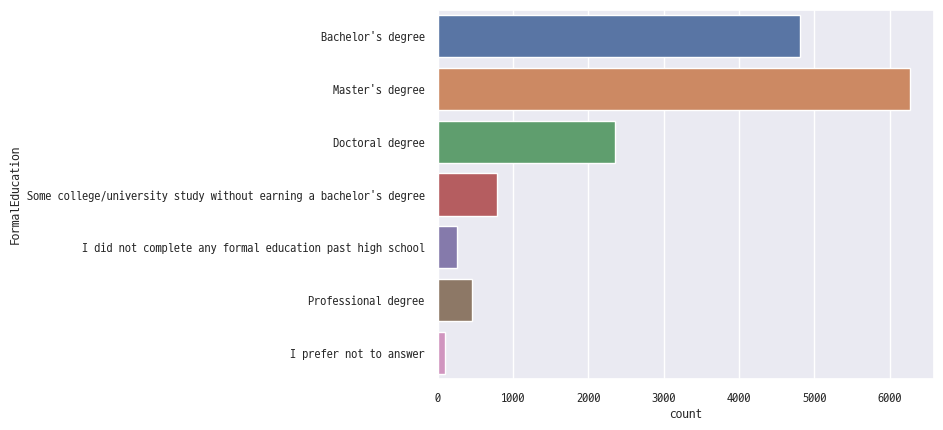

In [114]:
sns.countplot(mca, y="FormalEducation")

In [116]:
mca["MajorSelect"].value_counts()

Computer Science                                                4397
Mathematics or statistics                                       2220
Engineering (non-computer focused)                              1339
Electrical Engineering                                          1303
Other                                                            848
Physics                                                          830
Information technology, networking, or system administration     693
A social science                                                 531
Biology                                                          274
Management information systems                                   237
A humanities discipline                                          198
A health science                                                 152
Psychology                                                       137
I never declared a major                                          65
Fine arts or performing arts      

In [122]:
# major_df
major_count_df = pd.DataFrame(mca["MajorSelect"].value_counts())
major_rate_df = mca["MajorSelect"].value_counts(normalize=True)
# major_df
major_df = major_count_df.merge(major_rate_df, left_index=True, right_index=True)
major_df.columns = ["응답수", "비율"]
major_df

,응답수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


<Axes: xlabel='응답수'>

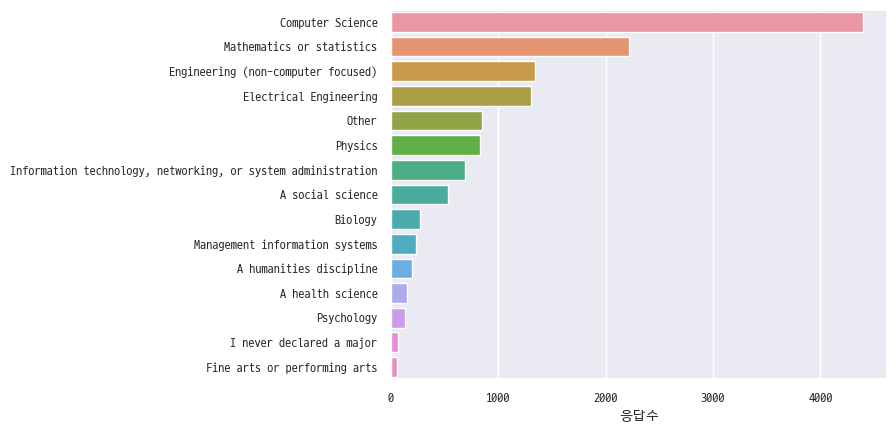

In [130]:
# plt.xticks(rotation=30)
sns.barplot(major_df, y=major_df.index, x="응답수")

<Axes: xlabel='count', ylabel='MajorSelect'>

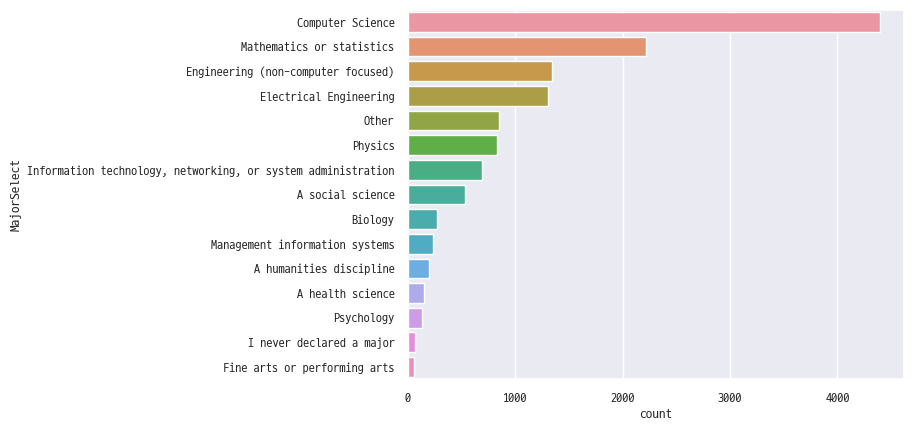

In [141]:
sns.countplot(mca, y="MajorSelect", order=mca["MajorSelect"].value_counts().index)

In [137]:
work_count_df = pd.DataFrame(mca["EmploymentStatus"].value_counts())
work_rate_df = pd.DataFrame(mca["EmploymentStatus"].value_counts(normalize=True))
work_df = work_count_df.merge(work_rate_df, left_index=True, right_index=True)
work_df.columns = ["응답수", "비율"]
work_df

,응답수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<Axes: xlabel='count', ylabel='EmploymentStatus'>

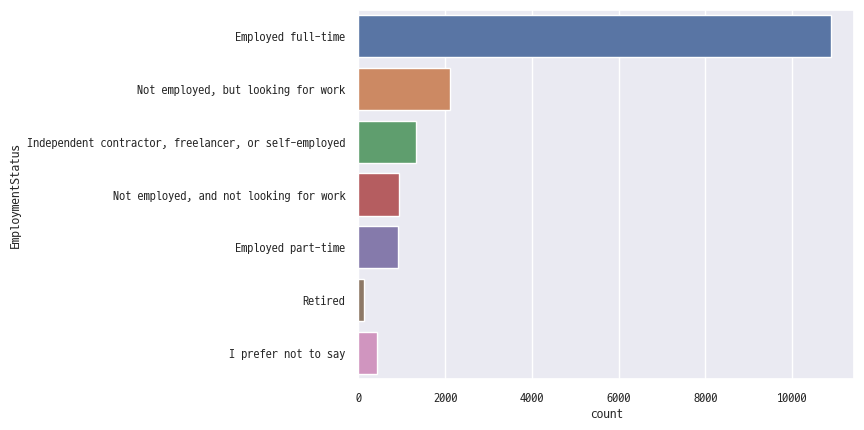

In [142]:
sns.countplot(mca, y="EmploymentStatus")

In [145]:
mcq.loc[mcq["Column"].str.contains("Tenure")]

,Column,Question,Asked
86,Tenure,How long have you been writing code to analyze...,All


In [147]:
# mca
mca["Tenure"].value_counts()

1 to 2 years                          3424
3 to 5 years                          3355
Less than a year                      2380
More than 10 years                    2028
6 to 10 years                         1714
I don't write code to analyze data     631
Name: Tenure, dtype: int64

In [148]:
mca["Tenure"].describe()

count            13532
unique               6
top       1 to 2 years
freq              3424
Name: Tenure, dtype: object